# Feature engineering

## 1. Load the dataset (train and test separately)
## 2. Column Name: Create new feature Title
## 3. Column Cabin : Create new features Cabin_letter and Num_Cabs
## 4. Column Ticket : Create new feature Ticket_letters
## 5. Column SibSp and Parch : Create new feature TravelGroup
## 6. Encoding (pandas: dummy)
## 7. Save dataframe

### Load python modules


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.max_columns",101)

## 1. Load the dataset (train and test separately)

In [2]:
train_data = './data/train.ETL.001.csv'
test_data = './data/test.ETL.001.csv'
df_train = pd.read_csv(train_data, index_col=0)
df_test = pd.read_csv(test_data, index_col=0)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,missing,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,missing,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,missing,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,missing,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,missing,S


In [5]:
df_test.count()  # check for missing values

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64

### Set the PassengerId as the index

In [6]:
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

In [7]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S


In [8]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,missing,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,missing,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,missing,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,missing,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,missing,S


## 2. Column Name: Create new feature Title

As seen in the data exploration step, one can take the title in the name column as another feature. One needs to write a function to extract the name first. What titles are there? All titles have a . at the end.

In [9]:
def new_feature_title(row):
    # print(row['Name'])
    title = re.findall(r'\, (.*?)\.', row['Name'])[0]
    return title
    
df_train['Title'] = df_train.apply(lambda x: new_feature_title(x), axis = 1)
df_test['Title'] = df_test.apply(lambda x: new_feature_title(x), axis = 1)

In [10]:
df_train['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [11]:
df_test['Title'].unique().tolist()

['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

In [12]:
df_train[df_train.Name.str.contains('Jonkheer')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,missing,S,Jonkheer


The test set contains fewer titles compared to the training set. But all of the titles in the test set are in the training set. If the length is 891, that means all the titles in the test set are in the training set.

In [13]:
df_train['Title'].isin(df_test['Title']).count()  

891

## 3. Column Cabin : Create new features Cabin_letter and Num_Cabs

In [14]:
df_train[df_train.Cabin.str.contains('F', na=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Mrs
76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
129,1,3,"Peter, Miss. Anna",female,21.5,1,1,2668,22.3583,F E69,C,Miss
149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,Mr
184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,Master
194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,Master
341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S,Master
346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S,Miss
517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S,Mrs


In [15]:
def new_feature_num_cabins(row):
    r = row['Cabin']
    t_ = re.findall(r'(\w\d\d)', r)
#     if len(t_) > 1:
#         print(t_)
    return len(t_)
    
df_train['Num_cabins'] = df_train.apply(lambda x: new_feature_num_cabins(x), axis=1)
df_train[df_train.Num_cabins > 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins
PassengerId,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,Mr,3
89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,Miss,3
98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,Mr,2
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,Mr,2
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Miss,2
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,Mrs,2
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Master,2
312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,4
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S,Miss,3


In [16]:
df_test['Num_cabins'] = df_test.apply(lambda x: new_feature_num_cabins(x), axis=1)
df_train[df_train.Num_cabins > 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins
PassengerId,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,Mr,3
89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,Miss,3
98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,Mr,2
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,Mr,2
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Miss,2
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,Mrs,2
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Master,2
312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,4
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S,Miss,3


In [17]:
def new_feature_cabin_letter(row):
    r = row['Cabin']
    if not r == 'missing':
        t_ = re.findall(r'(.*?)\d', r)
    #     if len(t_) > 1:
    #         print(t_)
        return t_[0]
    else:
        return 'missing'
    
df_train['Cabin_letter'] = df_train.apply(lambda x: new_feature_cabin_letter(x), axis=1)
df_test['Cabin_letter'] = df_test.apply(lambda x: new_feature_cabin_letter(x), axis=1)
df_train[df_train.Num_cabins > 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter
PassengerId,,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,Mr,3,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,Miss,3,C
98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,Mr,2,D
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,Mr,2,B
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Miss,2,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,Mrs,2,B
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Master,2,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,4,B
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S,Miss,3,C


## 4. Column Ticket : Create new feature Ticket_letters

As seen in data exploration, some tickets have some letters before the ticket, others only have digits. Might be useful as a feature.

Assumption:

- only the letters before the / are relevant until the .
- decision to remove letters LP and AQ from the test set, because those letters are not in the training set

In [18]:
def unique_letters(row):
    pat = re.findall(r'([^\d]+)\d', row) # match only those that contains letters before digits
    if len(pat) > 0:
        pat = re.findall(r'([^\/]+)', pat[0]) # stop at / 
        pat = [s.replace('.', '') for s in pat] # remove .
        return pat[0].strip() # remove whitespace
    return 'digits'  # not a letter

df_train['Ticket_letters'] = df_train['Ticket'].apply(lambda x: unique_letters(x))
df_test['Ticket_letters'] = df_test['Ticket'].apply(lambda x: unique_letters(x))
df_train['Ticket_letters'].unique()

array(['A', 'PC', 'STON', 'digits', 'PP', 'CA', 'SC', 'SP', 'SOC', 'SO',
       'W', 'SOTON', 'WEP', 'C', 'SOP', 'Fa', 'FCC', 'SW', 'SCO', 'P',
       'WE', 'FC'], dtype=object)

In [19]:
df_test['Ticket_letters'].unique()

array(['digits', 'A', 'WEP', 'SC', 'STON', 'PC', 'C', 'CA', 'W', 'SOTON',
       'FCC', 'FC', 'PP', 'SO', 'SOC', 'AQ', 'LP'], dtype=object)

In [20]:
letters_test_set = df_test['Ticket_letters'].unique().tolist()

In [21]:
for letter in letters_test_set:
    my_sum = (df_train['Ticket_letters'].isin([letter]).sum())
    if my_sum == 0:
        print(f'Letter {letter} is in the test set but not in the dataset!')

Letter AQ is in the test set but not in the dataset!
Letter LP is in the test set but not in the dataset!


In [22]:
df_test[df_test.Ticket.str.contains('AQ')]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter,Ticket_letters
PassengerId,,,,,,,,,,,,,,
1148,3,"Mahon, Mr. John",male,24.0,0,0,AQ/4 3130,7.7500,missing,Q,Mr,0,missing,AQ
1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,missing,Q,Miss,0,missing,AQ


In [23]:
df_test[df_test.Ticket.str.contains('LP')]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter,Ticket_letters
PassengerId,,,,,,,,,,,,,,
1204,3,"Sadowitz, Mr. Harry",male,24.0,0,0,LP 1588,7.575,missing,S,Mr,0,missing,LP


In [24]:
forbidden_letters= ['AQ', 'LP']

def new_feature_ticket_letters(row):
    pat = re.findall(r'([^\d]+)\d', row['Ticket']) # match only those that contains letters before digits
    if len(pat) > 0:
        pat = re.findall(r'([^\/]+)', pat[0]) # stop at / 
        pat = [s.replace('.', '') for s in pat] # remove .
        res = pat[0].strip() # remove whitespace
        if res in forbidden_letters:
            return 'missing'
        else:
            return res
    return 'digits'  # not a letter

df_train['Ticket_letters'] = df_train.apply(lambda x: new_feature_ticket_letters(x), axis=1)
df_test['Ticket_letters'] = df_test.apply(lambda x: new_feature_ticket_letters(x), axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter,Ticket_letters
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,Mr,0,missing,A
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,PC
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,Miss,0,missing,STON
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,digits
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,Mr,0,missing,digits


In [25]:
df_test[df_test.Ticket_letters.str.contains('miss')]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter,Ticket_letters
PassengerId,,,,,,,,,,,,,,
1148,3,"Mahon, Mr. John",male,24.0,0,0,AQ/4 3130,7.7500,missing,Q,Mr,0,missing,missing
1204,3,"Sadowitz, Mr. Harry",male,24.0,0,0,LP 1588,7.5750,missing,S,Mr,0,missing,missing
1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,missing,Q,Miss,0,missing,missing


In [26]:
df_train[df_train.Ticket_letters.str.contains('miss')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter,Ticket_letters
PassengerId,,,,,,,,,,,,,,,


## 5. Column SibSp and Parch: Create new feature TravelGroup

Feature to indciate the number of passengers that travel in a group, i.e. the number of siblings/spouses or parents with that passenger. This is created very simplistic, taking only the sum of number of siblings/spouses and parents with that passenger. 

Looking at the histogram, it is not a good idea to use continuous values, instead one can categorize the travel group into four classes:

- Alone: Passenger travels not in a group
- Duo: Passengers travel in a group of 2 (1 including passenger)
- GroupSmall: Passengers travel in a group of size between 3 and 4 (2, 3 including passenger)
- GroupLarge: Passengers travel in a group of size larger than 5 (4 including passenger)

In [27]:
def feature_travelgroup(row):
    return (row['SibSp'] + row['Parch'])

df_train['TravelGroup'] = df_train.apply(lambda x: feature_travelgroup(x), axis=1)
df_test['TravelGroup'] = df_test.apply(lambda x: feature_travelgroup(x), axis=1)


print(np.max(df_train.TravelGroup))
print(np.max(df_test.TravelGroup))

10
10


Text(0,0.5,'Counts')

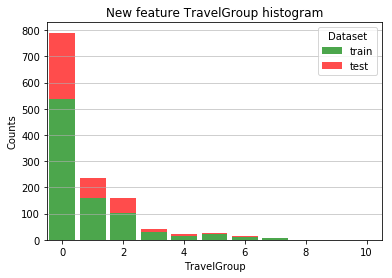

In [28]:
# Quick check on the histogram
plt.figure()
plt.title('New feature TravelGroup histogram')
bins = np.arange(0,10+1,1)-0.5
plt.xlim(-0.5,10.5)
Y = [df_train['TravelGroup'].values, df_test['TravelGroup'].values]
color = ['green', 'red']
label = ['train', 'test']
n, bins, patches = plt.hist(x=Y, stacked=True, color=color, bins=bins, alpha=0.7, rwidth=0.85, density=False, label=label)
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Dataset')
plt.xlabel('TravelGroup')
plt.ylabel('Counts')


# plt.figure()

In [29]:
def new_feature_travelgroup(row):
    n = (row['SibSp'] + row['Parch'])
    if n == 0:
        return 'Alone'
    if (n == 1):
        return 'Duo'
    if (n > 1) & (n < 4):
        return 'GroupSmall'
    if (n >= 4):
        return 'GroupLarge'

df_train['TravelGroup'] = df_train.apply(lambda x: new_feature_travelgroup(x), axis=1)
df_test['TravelGroup'] = df_test.apply(lambda x: new_feature_travelgroup(x), axis=1)

In [30]:
df_test[df_test['TravelGroup'].str.contains('Alone', na=False)].head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_cabins,Cabin_letter,Ticket_letters,TravelGroup
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,missing,Q,Mr,0,missing,digits,Alone
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,missing,Q,Mr,0,missing,digits,Alone
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,missing,S,Mr,0,missing,digits,Alone
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,missing,S,Mr,0,missing,digits,Alone
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,missing,Q,Miss,0,missing,digits,Alone


In [31]:
df_train.count()

Survived          891
Pclass            891
Name              891
Sex               891
Age               891
SibSp             891
Parch             891
Ticket            891
Fare              891
Cabin             891
Embarked          891
Title             891
Num_cabins        891
Cabin_letter      891
Ticket_letters    891
TravelGroup       891
dtype: int64

## 6. Save dataframe feature engineered

In [32]:
train_data = './data/train.feature_eng.001.csv'
test_data = './data/test.feature_eng.001.csv'
df_train.to_csv(train_data)
df_test.to_csv(test_data)

## 7. Encoding (pandas: dummy)

The following columns will be used for modeling:

- PassengerId
- Survived (training set only)
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Cabin_letter
- Embarked
- Title
- Num_cabins
- Ticket_letters
- TravelGroup

Out of those the following need encoding:

- Pclass
- Sex
- Cabin_letter
- Embarked
- Title
- Ticket_letters
- TravelGroup


In [33]:
df_orig_test = df_test
df_orig_train = df_train

def my_dummy(df, colname):
    df_dummy = pd.get_dummies(df[colname], prefix=colname)  # dummy encoding
    df = pd.concat([df, df_dummy], axis=1)  # combine the dfs
    df = df.drop(colname, axis=1) # remove the original column
    return df

cols_encoding = [
    'Pclass',
    'Sex',
    'Cabin_letter',
    'Embarked',
    'Title',
    'Ticket_letters',
    'TravelGroup'
]

for col in cols_encoding:
    df_train = my_dummy(df_train, col)
    df_test = my_dummy(df_test, col)    

cols_to_remove = [
    'Name',
    'Ticket',
    'Cabin'
]

for col in cols_to_remove:
    df_train = df_train.drop(col, axis=1)
    df_test = df_test.drop(col, axis=1)



In [34]:
cols_train = df_train.columns.tolist()

In [35]:
cols_test = df_test.columns.tolist()

### Treatment of missing columns in the test set compared to the training set

In [36]:
cols_to_add = []
for item in cols_train:
    if (not item in cols_test):
        print(f'{item} is not in the test dataframe!')
        if item == 'Survived':
            pass
        else:
            print(f'Adding {item} column to the test dataframe!')
            df_test[item] = 0
        
print(len(df_test.columns))
print(len(df_train.columns))

Survived is not in the test dataframe!
Embarked_missing is not in the test dataframe!
Adding Embarked_missing column to the test dataframe!
Title_Capt is not in the test dataframe!
Adding Title_Capt column to the test dataframe!
Title_Don is not in the test dataframe!
Adding Title_Don column to the test dataframe!
Title_Jonkheer is not in the test dataframe!
Adding Title_Jonkheer column to the test dataframe!
Title_Lady is not in the test dataframe!
Adding Title_Lady column to the test dataframe!
Title_Major is not in the test dataframe!
Adding Title_Major column to the test dataframe!
Title_Mlle is not in the test dataframe!
Adding Title_Mlle column to the test dataframe!
Title_Mme is not in the test dataframe!
Adding Title_Mme column to the test dataframe!
Title_Sir is not in the test dataframe!
Adding Title_Sir column to the test dataframe!
Title_the Countess is not in the test dataframe!
Adding Title_the Countess column to the test dataframe!
Ticket_letters_Fa is not in the test da

In [37]:
df_test.sample(10)

,Age,SibSp,Parch,Fare,Num_cabins,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_F E,Cabin_letter_F G,Cabin_letter_G,Cabin_letter_missing,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Ticket_letters_A,Ticket_letters_C,Ticket_letters_CA,Ticket_letters_FC,Ticket_letters_FCC,Ticket_letters_PC,Ticket_letters_PP,Ticket_letters_SC,Ticket_letters_SO,Ticket_letters_SOC,Ticket_letters_SOTON,Ticket_letters_STON,Ticket_letters_W,Ticket_letters_WEP,Ticket_letters_digits,Ticket_letters_missing,TravelGroup_Alone,TravelGroup_Duo,TravelGroup_GroupLarge,TravelGroup_GroupSmall,Embarked_missing,Title_Capt,Title_Don,Title_Jonkheer,Title_Lady,Title_Major,Title_Mlle,Title_Mme,Title_Sir,Title_the Countess,Ticket_letters_Fa,Ticket_letters_P,Ticket_letters_SCO,Ticket_letters_SOP,Ticket_letters_SP,Ticket_letters_SW,Ticket_letters_WE
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,24.0,1,0,14.4542,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1172,23.0,0,0,8.6625,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1139,42.0,1,1,32.5000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,35.0,0,0,211.5000,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1168,28.0,0,0,10.5000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
914,41.0,0,0,31.6833,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1047,24.0,0,0,7.5500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1076,27.0,1,1,247.5208,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1022,32.0,0,0,8.0500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 8. Save dataframe encoded

In [38]:
train_data = './data/train.encoded.001.csv'
test_data = './data/test.encoded.001.csv'
df_train.to_csv(train_data)
df_test.to_csv(test_data)